In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score

In [77]:
df = pd.read_csv('dadosacoes.csv', sep=',')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [79]:
df.describe()


,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


In [80]:
colunas = {'nome ação': 'Símbolo',
           'qtde cotas': 'Cotas',
           'valor de mercado R$ -(Bilhões)': 'Valor de Mercado',
           'preço ação R$': 'Valor Ações',}

In [81]:
df.rename(columns=colunas, inplace=True)

In [82]:
df.head()

,Símbolo,Valor Ações,Cotas,Valor de Mercado
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


In [83]:
sns.set_theme(style="darkgrid", font="Serif", palette="muted")



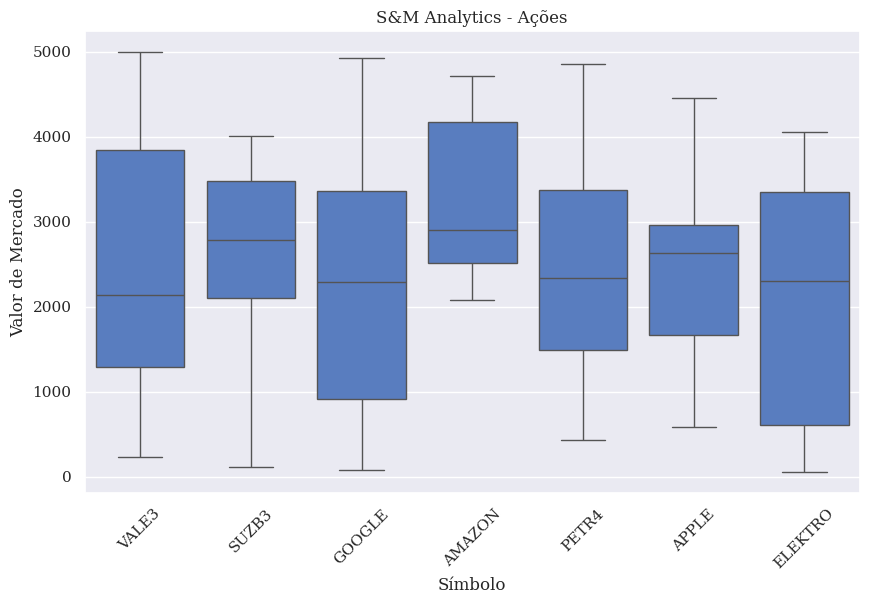

In [84]:
# Boxplot do preço das ações
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Símbolo'],y=df['Valor de Mercado'])
plt.title('S&M Analytics - Ações')
plt.xticks(rotation=45)
plt.show()

In [85]:
# Preencher valores ausentes apenas nas colunas numéricas
numeric_columns = df.select_dtypes(include=['number']).columns  # Selecionar apenas colunas numéricas
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


In [86]:
df = pd.get_dummies(df, columns=['Símbolo'], drop_first=True)

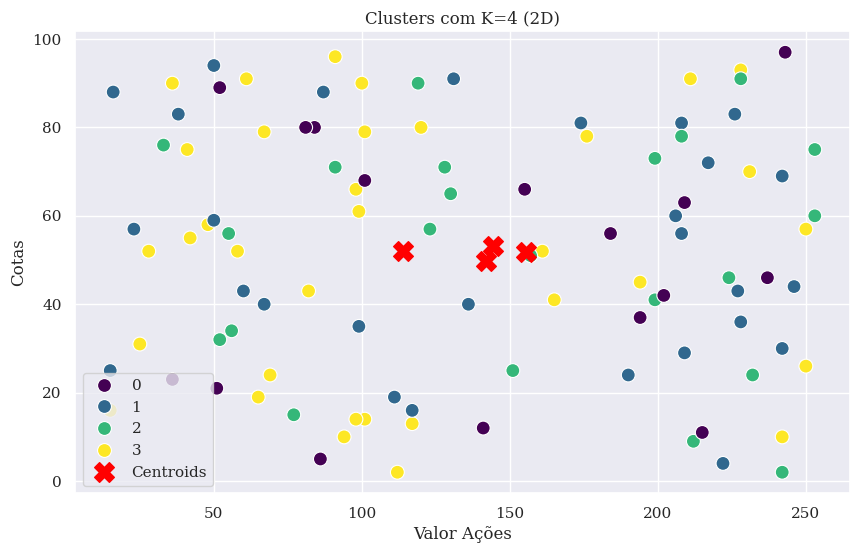

In [87]:
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df['Cluster_4'] = kmeans_4.fit_predict(X)

# Visualização 2D dos clusters com K=4
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df['Cluster_4'], palette='viridis', s=100)
plt.scatter(kmeans_4.cluster_centers_[:, 0], kmeans_4.cluster_centers_[:, 1], 
            color='red', marker='X', s=200, label='Centroids')
plt.title('Clusters com K=4 (2D)')
plt.xlabel('Valor Ações')
plt.ylabel('Cotas')
plt.legend()
plt.show()

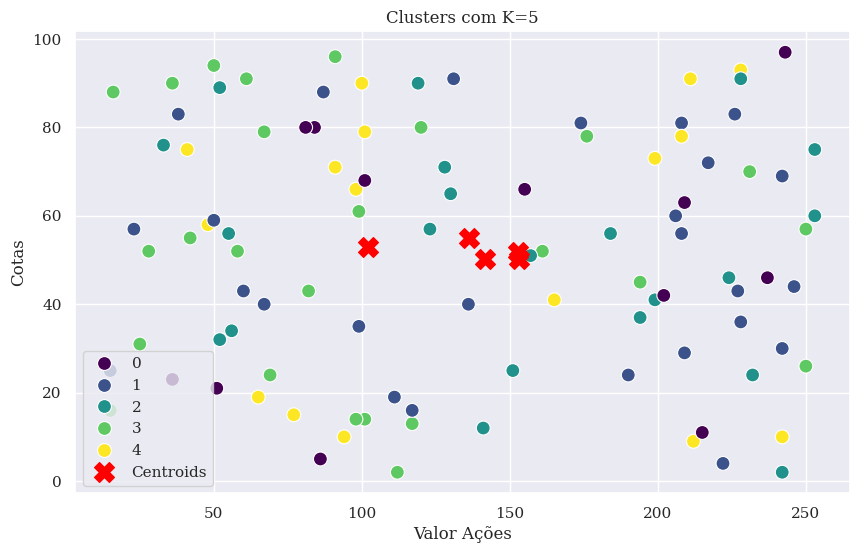

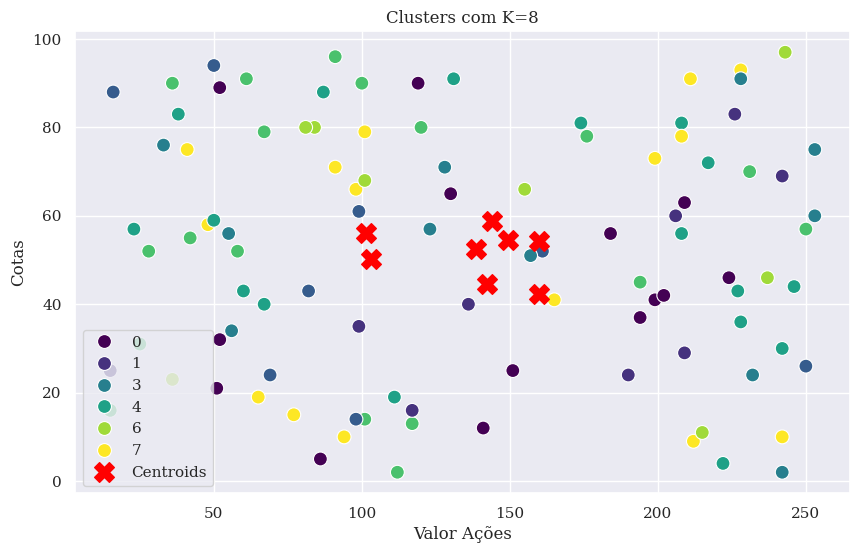

In [88]:
for n_clusters in [5, 8]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df[f'Cluster_{n_clusters}'] = kmeans.fit_predict(X)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df[f'Cluster_{n_clusters}'], palette='viridis', s=100)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                color='red', marker='X', s=200, label='Centroids')
    plt.title(f'Clusters com K={n_clusters}')
    plt.xlabel('Valor Ações')
    plt.ylabel('Cotas')
    plt.legend()
    plt.show()

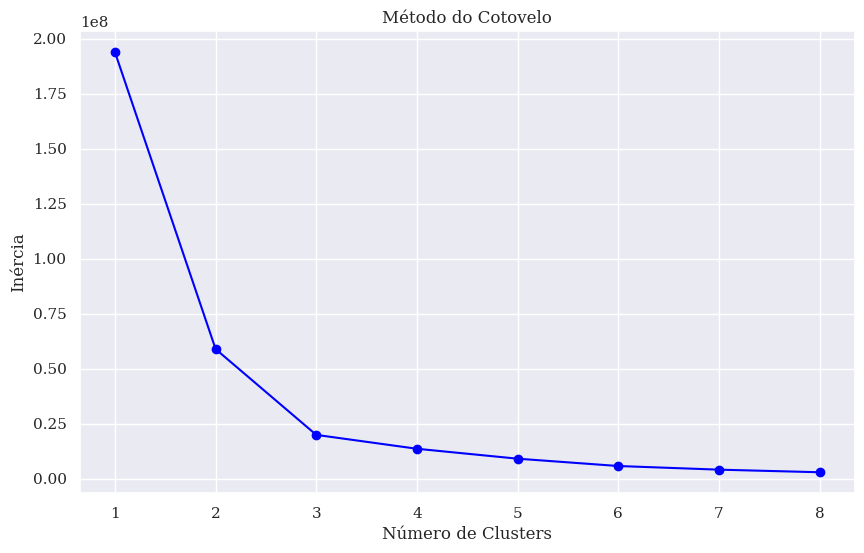

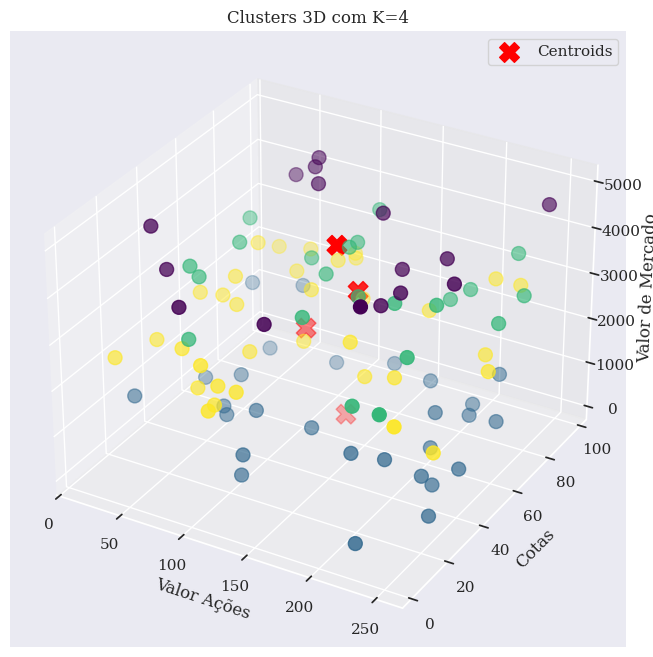

In [89]:
# Gráfico do Cotovelo
inertia = []
k_values = range(1, 9)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, '-o', color='blue')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

# Visualização 3D dos Clusters com K=4
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=df['Cluster_4'], cmap='viridis', s=100)
ax.scatter(kmeans_4.cluster_centers_[:, 0], kmeans_4.cluster_centers_[:, 1], kmeans_4.cluster_centers_[:, 2],
           c='red', marker='X', s=200, label='Centroids')
ax.set_title('Clusters 3D com K=4')
ax.set_xlabel('Valor Ações')
ax.set_ylabel('Cotas')
ax.set_zlabel('Valor de Mercado')
plt.legend()
plt.show()

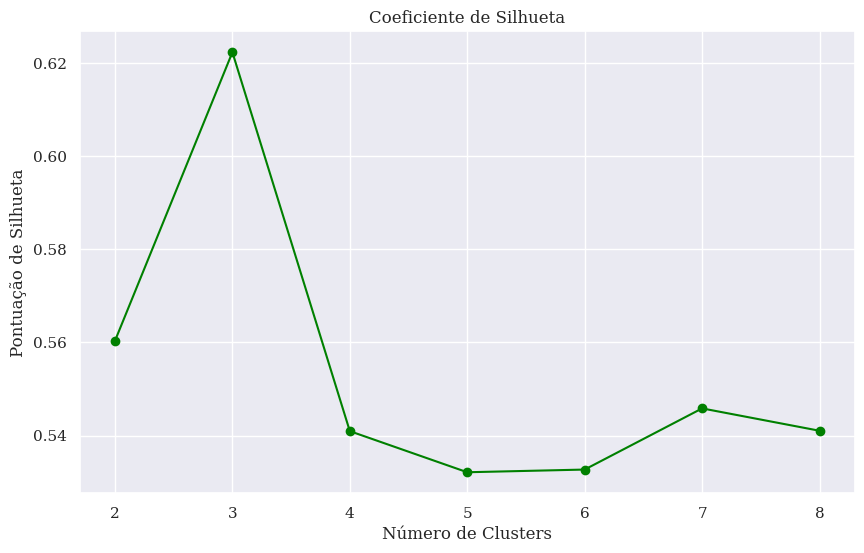

In [90]:
silhouette_scores = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 9), silhouette_scores, '-o', color='green')
plt.title('Coeficiente de Silhueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação de Silhueta')
plt.show()

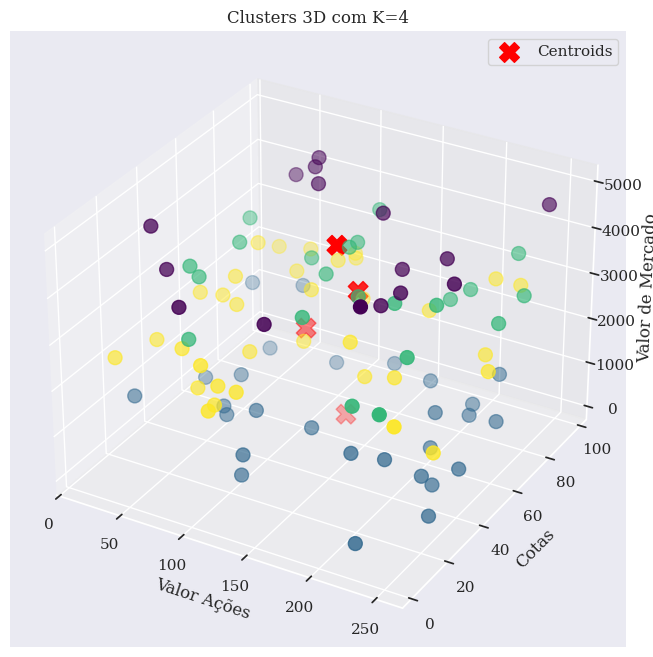

In [91]:
# Visualização 3D dos Clusters com K=4
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=df['Cluster_4'], cmap='viridis', s=100)
ax.scatter(kmeans_4.cluster_centers_[:, 0], kmeans_4.cluster_centers_[:, 1], kmeans_4.cluster_centers_[:, 2],
           c='red', marker='X', s=200, label='Centroids')
ax.set_title('Clusters 3D com K=4')
ax.set_xlabel('Valor Ações')
ax.set_ylabel('Cotas')
ax.set_zlabel('Valor de Mercado')
plt.legend()
plt.show()